**Predicción de la demanda con Random Forest**

Para que se ejecute el código basta pulsar el símbolo "play" de la izquierda. Para consultar el pdf accesible del gráfico generado por el código hay que dirigirse al último icono de la izquierda, con forma de carpeta, que tendrá el nombre de prediccion_ventas.pdf. Además, tenemos el error cuadrático medio y las tres predicciones futuras en la pantalla más abajo.

Error cuadrático medio (RMSE): 1613.05
Predicción para 1969-1: 13387.40
Predicción para 1969-2: 13879.49
Predicción para 1969-3: 20313.74


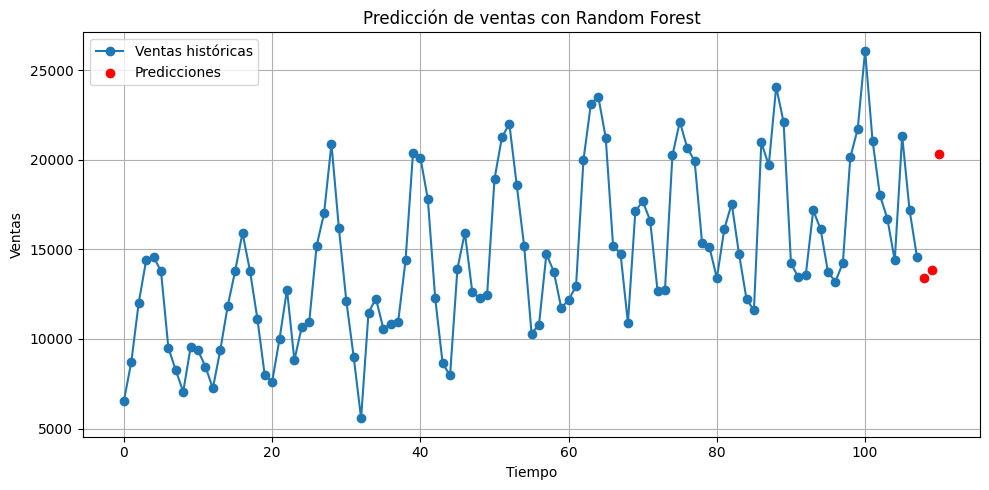

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Leemos el csv desde github saltando la primera fila del encabezado que da error
url = "https://raw.githubusercontent.com/AlmudenaCabello/AC_Modelos/main/monthly-car-sales.csv"
df = pd.read_csv(url, skiprows=1, names=["Month", "Sales"])

#Separamos año y mes
df[['Anyo', 'Mes']] = df['Month'].str.split('-', expand=True)
df['Anyo'] = df['Anyo'].astype(int)
df['Mes'] = df['Mes'].astype(int)

#Preparamos los datos
X = df[['Anyo', 'Mes']]
y = df['Sales']

#Dividimos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Entrenarmos el modelo
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

#Comprobamos el error cuadrático medio
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Error cuadrático medio (RMSE): {rmse:.2f}')

#Calculamos las predicciones para los próximos 3 meses
ultimo_anyo = df['Anyo'].iloc[-1]
ultimo_mes = df['Mes'].iloc[-1]

futuros_meses = []
for i in range(1, 4):
    nuevo_mes = (ultimo_mes + i - 1) % 12 + 1
    nuevo_anyo = ultimo_anyo + (ultimo_mes + i - 1) // 12
    futuros_meses.append([nuevo_anyo, nuevo_mes])

futuros_meses_df = pd.DataFrame(futuros_meses, columns=['Anyo', 'Mes'])
predicciones = model.predict(futuros_meses_df)

#Mostramos las predicciones
for i, (anyo, mes) in enumerate(futuros_meses):
    print(f'Predicción para {anyo}-{mes}: {predicciones[i]:.2f}')

#Graficamos
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label="Ventas históricas", marker='o')
plt.scatter(df.index[-1] + np.arange(1, 4), predicciones, color='red', label="Predicciones")
plt.xlabel("Tiempo")
plt.ylabel("Ventas")
plt.title("Predicción de ventas con Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()

#Guardamos como PDF accesible
plt.savefig("prediccion_ventas.pdf", format='pdf')
plt.show()

